<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/Underhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import fastai
import torch

In [49]:
torch.cuda.is_available()

True

In [50]:
from fastai.vision.all import *


In [51]:
#path


path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [52]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [53]:
(path/'train'/'3').ls()

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/54782.png'),Path('/root/.fastai/data/mnist_sample/train/3/5337.png'),Path('/root/.fastai/data/mnist_sample/train/3/1341.png'),Path('/root/.fastai/data/mnist_sample/train/3/59598.png'),Path('/root/.fastai/data/mnist_sample/train/3/7660.png'),Path('/root/.fastai/data/mnist_sample/train/3/18727.png'),Path('/root/.fastai/data/mnist_sample/train/3/18992.png'),Path('/root/.fastai/data/mnist_sample/train/3/31044.png'),Path('/root/.fastai/data/mnist_sample/train/3/50206.png'),Path('/root/.fastai/data/mnist_sample/train/3/11010.png')...]

In [54]:
(path/'valid'/'3').ls()

(#1010) [Path('/root/.fastai/data/mnist_sample/valid/3/7829.png'),Path('/root/.fastai/data/mnist_sample/valid/3/5329.png'),Path('/root/.fastai/data/mnist_sample/valid/3/4983.png'),Path('/root/.fastai/data/mnist_sample/valid/3/1856.png'),Path('/root/.fastai/data/mnist_sample/valid/3/7365.png'),Path('/root/.fastai/data/mnist_sample/valid/3/2312.png'),Path('/root/.fastai/data/mnist_sample/valid/3/2020.png'),Path('/root/.fastai/data/mnist_sample/valid/3/6811.png'),Path('/root/.fastai/data/mnist_sample/valid/3/4437.png'),Path('/root/.fastai/data/mnist_sample/valid/3/2069.png')...]

In [55]:
(path/'valid'/'7').ls()

(#1028) [Path('/root/.fastai/data/mnist_sample/valid/7/2700.png'),Path('/root/.fastai/data/mnist_sample/valid/7/551.png'),Path('/root/.fastai/data/mnist_sample/valid/7/2808.png'),Path('/root/.fastai/data/mnist_sample/valid/7/2591.png'),Path('/root/.fastai/data/mnist_sample/valid/7/6619.png'),Path('/root/.fastai/data/mnist_sample/valid/7/2301.png'),Path('/root/.fastai/data/mnist_sample/valid/7/8421.png'),Path('/root/.fastai/data/mnist_sample/valid/7/7144.png'),Path('/root/.fastai/data/mnist_sample/valid/7/5657.png'),Path('/root/.fastai/data/mnist_sample/valid/7/6741.png')...]

In [56]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()


In [57]:
im_3 = threes[10]
im_3

Path('/root/.fastai/data/mnist_sample/train/3/10093.png')

In [58]:
img = Image.open(im_3)
img

In [59]:
im_7 = sevens[3]
img7 = Image.open(im_7)

In [60]:
img7

In [61]:
array(img7)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  19],
       [  0,   0,   0,   0,  13, 144]], dtype=uint8)

In [62]:
tensor(img7)[5:15, 5:15]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  29, 104, 141],
        [  0,   0,   0,   0,   0,   0, 101, 253, 252, 252],
        [  0,   0,   0,   0,  19, 123, 246, 253, 252, 252],
        [  0,   0,   0,  13, 144, 252, 252, 253, 227, 103],
        [  0,   0,   0, 154, 253, 253, 253, 239,  75,   0],
        [  0,   0,  76, 253, 252, 252, 227,  88,   0,   0],
        [  0,   0, 113, 253, 252, 186,  43,   0,   0,   0],
        [  0,   0,  13, 140, 115,   6,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [63]:
import pandas as pd

In [64]:
im_3_ten = tensor(img)


df = pd.DataFrame(im_3_ten[4:25, 4:25])

df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,30,144,173,254,254,254,216,90,0,0,0,0,0
2,0,0,0,0,0,0,12,148,244,254,253,253,189,230,253,242,0,0,0,0,0
3,0,0,0,0,0,0,136,253,253,254,227,63,2,75,253,242,0,0,0,0,0
4,0,0,0,0,0,0,94,231,231,169,41,0,0,114,253,242,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,5,185,253,218,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,196,253,222,86,0,0,0,0,0
7,0,0,0,0,0,0,0,0,5,75,122,213,253,253,112,0,0,0,0,0,0
8,0,0,0,0,0,0,8,127,198,254,253,253,253,253,74,0,0,0,0,0,0
9,0,0,0,0,0,38,156,253,253,255,253,223,183,253,192,7,0,0,0,0,0


In [65]:
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]

<Axes: >

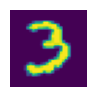

In [66]:
show_image(three_tensors[4])

In [67]:
## Ma'lumotlarni stacklash va ularni 1 a va 0 lar oralig'iga olib kelish.

stacked_thress = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

In [68]:
stacked_thress.shape

torch.Size([6131, 28, 28])

In [69]:
mean3 = stacked_thress.mean(0)

<Axes: >

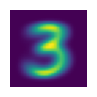

In [70]:
show_image(mean3)

In [71]:
mean7 = stacked_sevens.mean(0)

<Axes: >

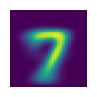

In [ ]:
show_image(mean7)

<Axes: >

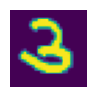

In [72]:
s_3 = stacked_thress[5]
show_image(s_3)

In [73]:
valid_3_tensor = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tensor = valid_3_tensor.float() / 255


valid_7_tensor = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tensor = valid_7_tensor.float() / 255

In [74]:
valid_7_tensor.shape


torch.Size([1028, 28, 28])

In [75]:
## MAE xatolik funksiyasi

def mae(a, b):
  return(a - b).abs().mean((-1, -2))

mae(s_3, mean3)

tensor(0.1700)

In [76]:
valid_3_tensor = mae(valid_3_tensor, mean3)
valid_7_tensor = mae(valid_7_tensor, mean7)


valid_3_tensor, valid_7_tensor

(tensor([0.1419, 0.1320, 0.1102,  ..., 0.1181, 0.1430, 0.1188]),
 tensor([0.1064, 0.1264, 0.0895,  ..., 0.0911, 0.1239, 0.1061]))

In [81]:
### NATIJA QAYTARUVCHI FUNCTION

def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)



is_3(s_3).float()

tensor(1.)